# A Gentle Introduction to TFP

In [3]:
import seaborn as sns

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions

In [97]:
from tfp_helper import *

## Distribution

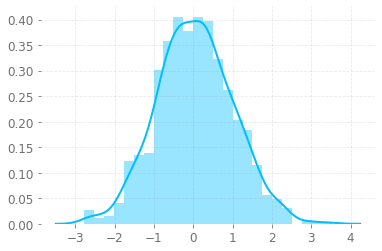

In [26]:
normal = tfd.Normal(0, 1)
normal_samples = normal.sample(1000)
sns.distplot(normal_samples, norm_hist=True);

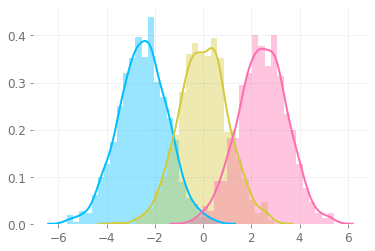

In [33]:
normal = tfd.Normal([-2.5, 0, 2.5], 1)
normal_samples = normal.sample(1000)
for i in range(3):
    sns.distplot(normal_samples[:, i], norm_hist=True);

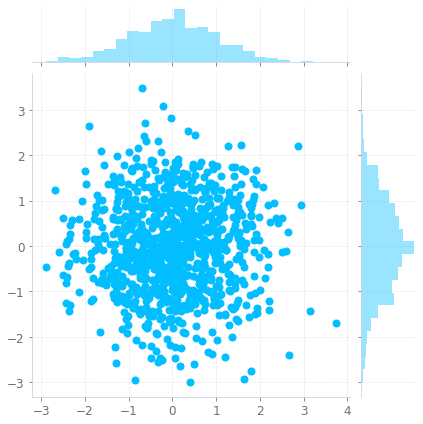

In [34]:
mvn = tfd.MultivariateNormalDiag(loc=[0., 0.], scale_diag=[1., 1.])
samples = mvn.sample(1000)
sns.jointplot(samples[:, 0], samples[:, 1], kind='scatter');

## Bijectors

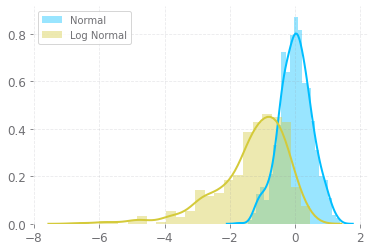

In [43]:
log_bijector = tfp.bijectors.Log()
normal = tfd.Normal(0., 0.5)
log_normal = log_bijector(normal)
bsamples = log_normal.sample(1000)
samples = normal.sample(1000)
sns.distplot(samples, label='Normal')
sns.distplot(bsamples, label='Log Normal')
plt.legend();

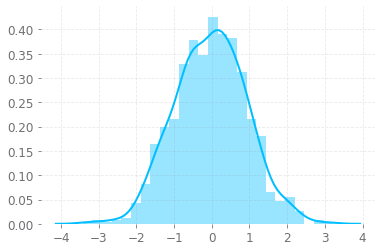

In [56]:
normal = tfd.Normal(0, 1)
normal_samples = normal.sample(1000)
sns.distplot(normal_samples, norm_hist=True);

## Joint Log Probability

```python
def joint_log_prob(data, params):
    return ...
```

## Coint Toss Example

## Simulate

In [40]:
from tfp_helper import evaluate
import matplotlib.pyplot as plt

In [60]:
p = 0.75
def simulate_coin_toss(p, n=100):
    bernoulli = tfd.Bernoulli(probs=p)
    obs = bernoulli.sample(n)
    return evaluate(obs)

In [71]:
def plot_obs(obs):
    ones = (obs == 1).sum()
    zeroes = (obs == 0).sum()
    plt.bar([0, 1], [zeroes/len(obs), ones/len(obs)])
    plt.ylim([0., 1.])
    plt.xticks([0, 1])

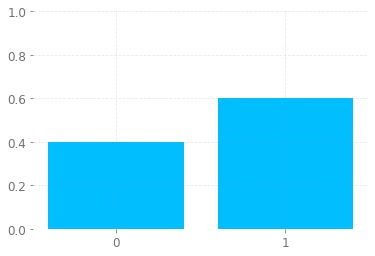

In [75]:
obs = simulate_coin_toss(0.75, 5)
plot_obs(obs)

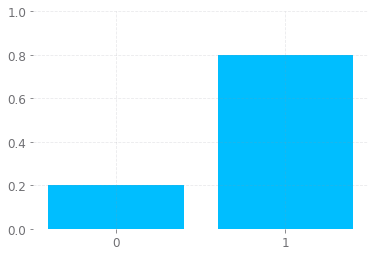

In [84]:
obs = simulate_coin_toss(0.75, 50)
plot_obs(obs)

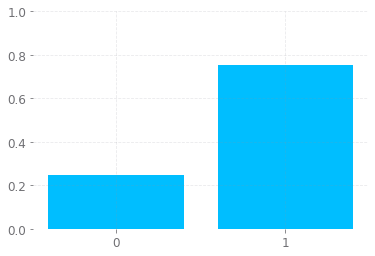

In [85]:
obs = simulate_coin_toss(0.75, 1000)
plot_obs(obs)

## Inference

In [87]:
def joint_log_prob(obs, p):
    var_p = tfd.Uniform(low=0., high=1.)
    var_obs = tfd.Bernoulli(probs=p)
    
    return (
        var_p.log_prob(p)
        + tf.reduce_sum(var_obs.log_prob(obs))
    )

In [88]:
from tfp_helper import infer

In [89]:
obs = simulate_coin_toss(0.75, 1000)

In [98]:
azdata = infer(joint_log_prob, obs,
              variables=['p'],
              initial_chain_state=[0.5],
              nsteps=50000,
              bijectors={
                  'lambda_1' : tfp.bijectors.Sigmoid(),
              })

100%|██████████| 10/10 [00:54<00:00,  5.48s/it]


In [91]:
import arviz as az

array([[<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

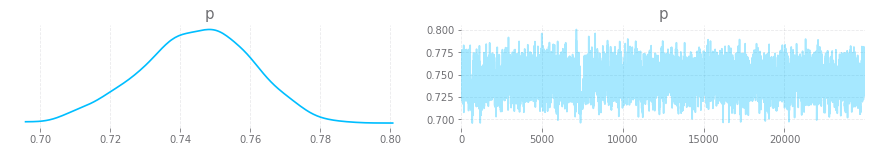

In [99]:
az.plot_trace(azdata)